<a href="https://colab.research.google.com/github/AnanyaCSE-039/ML-LAB/blob/main/1BM22CS039_Lab_4_Linear_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LinearRegression()

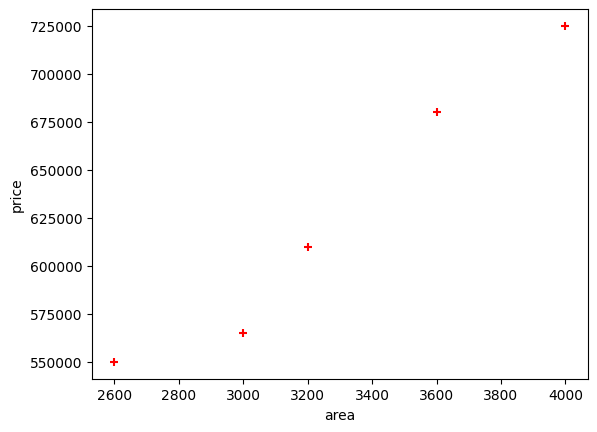

In [8]:
# -*- coding: utf-8 -*-
"""Linear-Regression-Housing_Area_Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CAlZml-P6V2V1RIrodgMfF8L3Ux4V9FT
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("/content/housing_area_price.csv")
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)


In [9]:
# -*- coding: utf-8 -*-
"""Multiple_LR_HomePrice.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1fK78C8TPV44HdvT6lsMhaau2wMtKXquQ
"""

import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted Per Capita Income in Canada (2020): 41288.69 USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


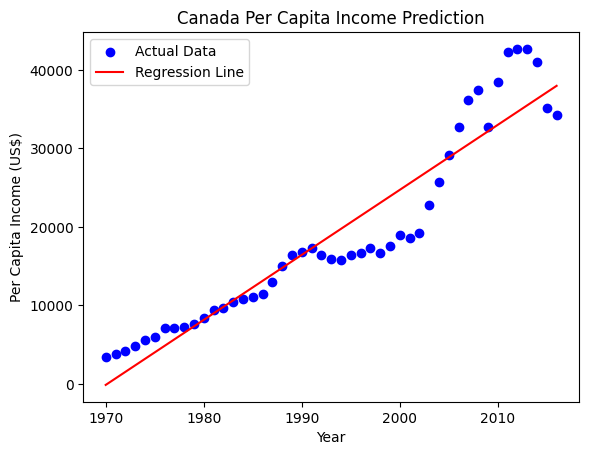

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Canada Per Capita Income data
canada_data = pd.read_csv("/content/canada_per_capita_income.csv")

# Inspect the dataset
print(canada_data.head())

# Prepare data for regression
X_canada = canada_data[['year']]
y_canada = canada_data['per capita income (US$)']

# Train the regression model
model_canada = LinearRegression()
model_canada.fit(X_canada, y_canada)

# Predict per capita income for 2020
predicted_income_2020 = model_canada.predict([[2020]])
print(f"Predicted Per Capita Income in Canada (2020): {predicted_income_2020[0]:.2f} USD")

# Plot the regression line
plt.scatter(X_canada, y_canada, color='blue', label='Actual Data')
plt.plot(X_canada, model_canada.predict(X_canada), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Salary for 12 years of experience: 139049.67 USD


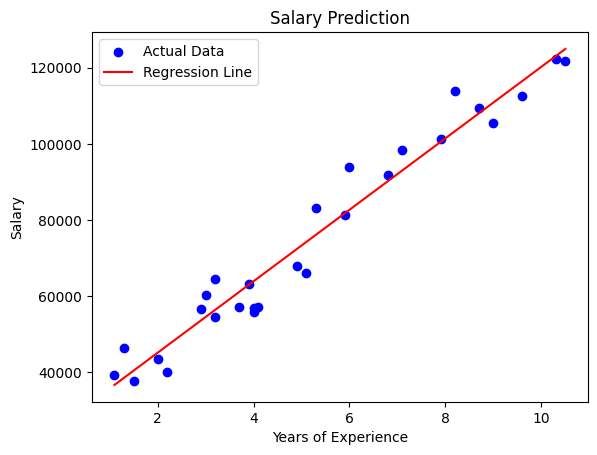

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# Define file path
file_path = "/content/salary.csv"

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError("The file salary.csv was not found. Please upload the file and try again.")

# Load Employee Salary data
salary_data = pd.read_csv(file_path)

# Drop rows with missing values
salary_data = salary_data.dropna()

# Prepare data for regression
X_salary = salary_data[['YearsExperience']]
y_salary = salary_data['Salary']

# Train the regression model
model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

# Predict salary for 12 years of experience
predicted_salary = model_salary.predict([[12]])
print(f"Predicted Salary for 12 years of experience: {predicted_salary[0]:.2f} USD")

# Plot the regression line
plt.scatter(X_salary, y_salary, color='blue', label='Actual Data')
plt.plot(X_salary, model_salary.predict(X_salary), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/hiring.csv"
df = pd.read_csv(file_path)

# Fill missing test scores with the mean
df.loc[:, "test_score(out of 10)"] = df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mean())

# Convert experience column to numeric values
def convert_experience(val):
    if isinstance(val, str):
        word_to_num = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6,
                       "seven": 7, "eight": 8, "nine": 9, "ten": 10}
        return word_to_num.get(val.lower(), 0)
    return val

df.loc[:, "experience"] = df["experience"].apply(convert_experience)

df.dropna(inplace=True)  # Remove any remaining missing values

# Define features (X) and target variable (y)
X = df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]]
y = df["salary($)"]

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for given candidates
candidates = pd.DataFrame([[2, 9, 6], [12, 10, 10]], columns=["experience", "test_score(out of 10)", "interview_score(out of 10)"])
predicted_salaries = model.predict(candidates)

# Print predictions
for i, salary in enumerate(predicted_salaries):
    print(f"Predicted salary for candidate {i+1}: ${salary:.2f}")

Predicted salary for candidate 1: $78581.11
Predicted salary for candidate 2: $56486.29


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/1000_Companies.csv"
data = pd.read_csv(file_path)

# Display first few rows of the dataset
print("Dataset Head:\n", data.head())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Define feature variables (X) and target variable (y)
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

# Apply One-Hot Encoding to 'State' column (categorical variable)
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['State'])],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Split data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare input data for prediction (91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, Florida State)
input_data = pd.DataFrame([[91694.48, 515841.3, 11931.24, 'Florida']], columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State'])

# Apply the same One-Hot Encoding transformation on input data
input_transformed = column_transformer.transform(input_data)

# Predict the profit
predicted_profit = model.predict(input_transformed)
print(f"Predicted Profit: {predicted_profit[0]:.2f} USD")


Dataset Head:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
Predicted Profit: 554066.30 USD
